# 경사하강법을 이용한 선형회귀

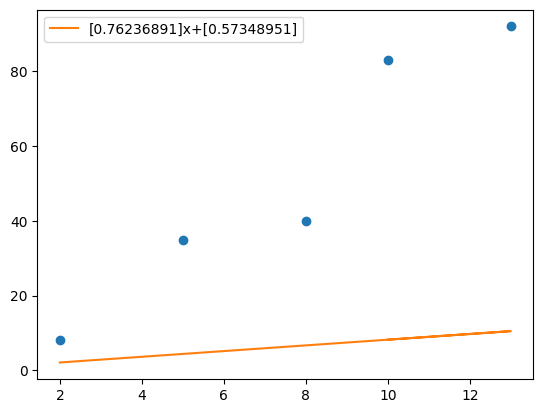

Epoch:     0/1000, loss: 2864.617742, W : 0.85194, b : 0.58254
Epoch:   100/1000, loss: 241.521196, W : 5.50294, b : 1.03401
Epoch:   200/1000, loss: 104.045311, W : 6.57022, b : 1.10840
Epoch:   300/1000, loss: 96.713417, W : 6.81747, b : 1.09662
Epoch:   400/1000, loss: 96.196710, W : 6.87706, b : 1.06524
Epoch:   500/1000, loss: 96.037894, W : 6.89371, b : 1.02949
Epoch:   600/1000, loss: 95.898866, W : 6.90051, b : 0.99286
Epoch:   700/1000, loss: 95.761916, W : 6.90505, b : 0.95613
Epoch:   800/1000, loss: 95.626108, W : 6.90906, b : 0.91950
Epoch:   900/1000, loss: 95.491384, W : 6.91294, b : 0.88300
24시간 일한 성과급: [166.84863644]


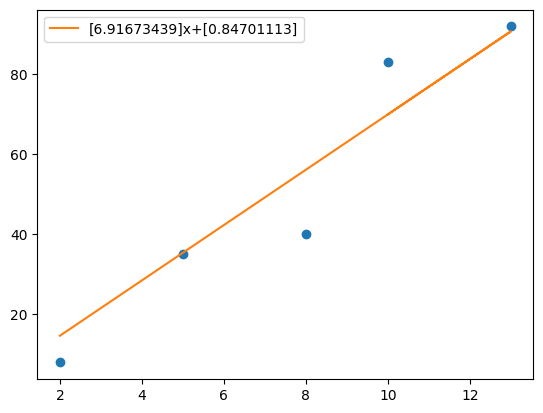

In [2]:
import numpy as np
import matplotlib.pylab as plt

x_data = np.array([2,5,8,13,10])   # 일한 시간(x)
y_data = np.array([8,35,40,92,83]) # 성과급 (y)

epochs = 1000                       # 학습 반복 횟수
learning_rate = 0.0001              # learning_rate 설정
W = np.random.rand(1)               # W 랜덤 설정
b = np.random.rand(1)               # b 랜덤 설정

y_pred = W*x_data+b

plt.plot(x_data,y_data,'o')
plt.plot(x_data[:],y_pred,label='{}x+{}'.format(W,b))
plt.legend()
plt.show()

for i in range(epochs):
    y_pred = W*x_data+b
    loss = (1/len(x_data)) * sum((y_pred-y_data)**2)   # 오차 측정
    dW = (2/len(x_data))*sum(x_data*(y_pred-y_data)) # W 미분
    db = (2/len(x_data))*sum(y_pred-y_data)           # b 미분
    W = W - learning_rate*dW                         # W 업데이트
    b = b - learning_rate*db                         # b 업데이트
    if i % 100 == 0:
        print(f'Epoch: {i:5}/1000, loss: {loss:5f}, W : {W.item():.5f}, b : {b.item():.5f}')

print(f'24시간 일한 성과급: {W*24+b}')
plt.plot(x_data,y_data,'o')
plt.plot(x_data[:],y_pred,label='{}x+{}'.format(W,b))
plt.legend()
plt.show()

# 경사하강법을 이용한 선형회귀 (다차원)

Epoch:     0/10000, loss: 7622.945358, W : [[13.048482800799741], [13.861166295725356]], b : [2.419964837473424]
Epoch:  1000/10000, loss: 1.295932, W : [[1.7983421337989822], [2.6110256287246036]], b : [75.18612861406913]
Epoch:  2000/10000, loss: 0.073498, W : [[1.5009766071386368], [2.313660102064256]], b : [77.77354603914625]
Epoch:  3000/10000, loss: 0.071966, W : [[1.4904502680137073], [2.3031337629393236]], b : [77.86513713102566]
Epoch:  4000/10000, loss: 0.071965, W : [[1.4900776497865067], [2.3027611447121066]], b : [77.86837933231511]
Epoch:  5000/10000, loss: 0.071965, W : [[1.4900644596031478], [2.3027479545287535]], b : [77.86849410187378]
Epoch:  6000/10000, loss: 0.071965, W : [[1.4900639926884118], [2.302747487614023]], b : [77.86849816456164]
Epoch:  7000/10000, loss: 0.071965, W : [[1.490063976160267], [2.302747471085881]], b : [77.86849830837525]
Epoch:  8000/10000, loss: 0.071965, W : [[1.4900639755751974], [2.302747470500811]], b : [77.86849831346602]
Epoch:  9000

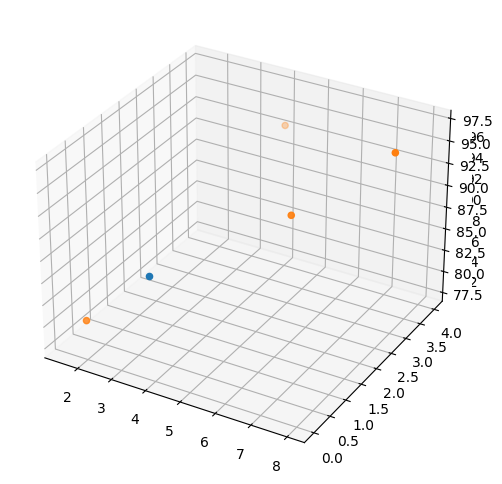

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_train = np.array([[2, 0], [4, 4], [6, 2], [8, 3]]) # 공부한 시간(x1), 과외 수업 횟수(x2)
y_train = np.array([[81], [93], [91], [97]])         # 성적(y)

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train[:,0])

W = np.random.rand(2,1)    # W (2,1) 형태 랜덤 설정
b = np.random.rand(1)      # b 랜덤 설정
learning_rate = 0.01       # learning_rate 설정
epochs = 10000              # 학습 반복 횟수

for i in range(epochs):
    y_pred = x_train @ W + b                           # 에측 직선 y = W1*x1 + W2 + W2 + b, 행렬곱으로 간단히 표현
    loss = (1/len(x_train)) * sum((y_pred-y_train)**2)          # 평균 제곱 오차(MSE) 구현
    dW1 = (2/len(x_train))*sum(x_train[:,0] @ (y_pred-y_train)) # W1으로 loss 미분
    dW2 = (2/len(x_train))*sum(x_train[:,1] @ (y_pred-y_train)) # W2으로 loss 미분
    db = (2/len(x_train))*sum(y_pred-y_train)

    W = W - learning_rate*dW1                       # W 업데이트
    W = W - learning_rate*dW2                       # W 업데이트
    b = b - learning_rate*db                              # b 업데이트
    if i % 1000 == 0:
        print(f'Epoch: {i:5}/10000, loss: {loss.item():5f}, W : {W.tolist()}, b : {b.tolist()}')

ax = fig.add_subplot(111, projection='3d')
ax.scatter(W[0], W[1], b)
ax.scatter(x_train[:,0], x_train[:,1], y_train[:,0])

# 경사하강법을 이용한 로지스틱 회귀

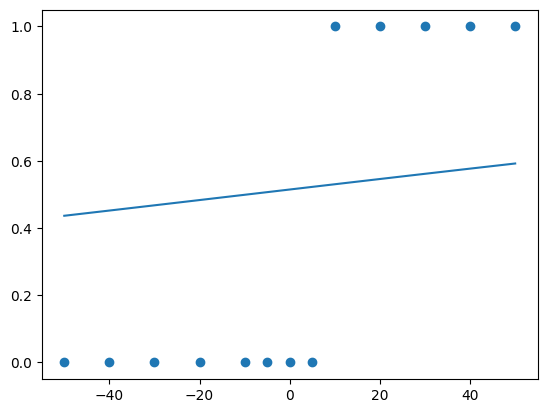

Epoch:     0/1000, loss: 0.632139, W : 0.10841, b : 0.05783
Epoch:   100/1000, loss: 0.193992, W : 0.21906, b : -0.05777
Epoch:   200/1000, loss: 0.182240, W : 0.22239, b : -0.16604
Epoch:   300/1000, loss: 0.171886, W : 0.22391, b : -0.26771
Epoch:   400/1000, loss: 0.162736, W : 0.22593, b : -0.36329
Epoch:   500/1000, loss: 0.154625, W : 0.22845, b : -0.45327
Epoch:   600/1000, loss: 0.147408, W : 0.23136, b : -0.53812
Epoch:   700/1000, loss: 0.140963, W : 0.23458, b : -0.61829
Epoch:   800/1000, loss: 0.135184, W : 0.23803, b : -0.69419
Epoch:   900/1000, loss: 0.129979, W : 0.24166, b : -0.76621


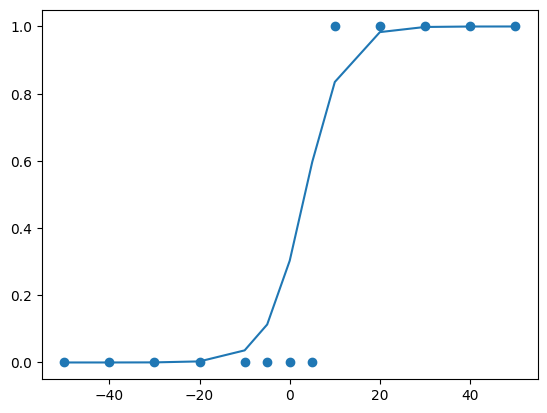

In [30]:
import numpy as np

x_train = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50]) 
y_train = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) 

W = np.random.rand(1) 
b = np.random.rand(1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # 시그모이드 함수 구현

epoch = 1000
lr = 0.01
delta = 1e-7

y_pred = sigmoid(W*x_train+b)
plt.scatter(x_train ,y_train)
plt.plot(x_train[:],y_pred)
plt.show()

for i in range(epoch):
    y_pred = sigmoid(W*x_train+b) # 일차직선에 시그모이드 함수를 적용한 예측 곡선
    loss = -(1/len(y_train))*np.sum(y_train*np.log(y_pred+delta)+(1-y_train)*np.log(1-y_pred+delta)) # 이진 교차 엔트로피 오차(BCE) 측정
    dW = (1/len(y_train))*np.sum((y_pred-y_train)*x_train) # loss를 W에 대해 편미분
    db = (1/len(y_train))*np.sum((y_pred-y_train))         # loss를 b에 대해 편미분
    W = W - lr*dW # W 업데이트
    b = b - lr*db # b 업데이트
    if i % 100 == 0:
        print(f'Epoch: {i:5}/1000, loss: {loss:5f}, W : {W.item():.5f}, b : {b.item():.5f}')

plt.scatter(x_train ,y_train)
plt.plot(x_train[:],y_pred)
plt.show()

# 로지스틱 회귀를 이용한 OX 이미지 판별

In [45]:
import cv2
import numpy as np
import os

def chage_array(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    otsu_threshold, image_result = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    th, dst = cv2.threshold(img, otsu_threshold, 255, cv2.THRESH_BINARY)
    img = np.where(dst == 255, 0, 1)
    return img

O_data = np.array([chage_array('./O/'+path) for path in os.listdir('./O/')]) # O 이미지 데이터 로드 (chage_array함수로 이진화, 정규화)
O_data = np.array([data.reshape(1,-1) for data in O_data])                   # (32x32) -> (1x1024) 형태로 변경
O_data_label = np.ones(len(O_data))                                          # O 데이터 개수 만큼의 1로 채운 정답 데이터 생성

X_data = np.array([chage_array('./X/'+path) for path in os.listdir('./X/')]) # X 이미지 데이터 로드 (chage_array함수로 이진화, 정규화)
X_data = np.array([data.reshape(1,-1) for data in X_data])                   # (32x32) -> (1x1024) 형태로 변경
X_data_label = np.zeros(len(X_data))                                         # X 데이터 개수 만큼의 0로 채운 정답 데이터 생성

datas = np.append(O_data,X_data, axis=0)                                     # O_data, X_data 합치기
labels = np.append(O_data_label, X_data_label)                               # O_data_label, X_data_label 합치기
data = [[x,y] for x, y in zip(datas, labels)]                                # data, label 형태로 만들기
data

[[array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]])

In [46]:
import random
random.shuffle(data) # random 으로 데이터 섞기
data

[[array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 0.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 0.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 0.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 0.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 0.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 0.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 0.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 0.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 0.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 0.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 0.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 0.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 0.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 0.0],
 [array([[0, 0, 0, ..., 0, 0, 0]]), 1.0],
 [array([[0, 0, 0, ..., 0, 0, 0]])

In [47]:
x_train = np.array([n[0] for n in data]) # 학습 데이터 나누기
y_train = np.array([n[1] for n in data]) # 정답 데이터 나누기
x_train.shape, y_train.shape

((60, 1, 1024), (60,))

In [48]:
import numpy as np

W = np.random.rand(1024,1) # 필요한 W 랜덤 설정
b = np.random.rand(1)      # 필요한 b 랜덤 설정

def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # 시그모이드 함수 구현

epoch = 2000 # 학습 횟수
lr = 0.01    # learning rate 설정
delta = 1e-7 # 오버플로우 방지

for i in range(epoch):
    y_pred = sigmoid(x_train@W+b)                                                                    # 예측 곡선
    loss = -(1/len(y_train))*np.sum(y_train*np.log(y_pred+delta)+(1-y_train)*np.log(1-y_pred+delta)) # 이진 교차 엔트로피 (BCE) 구현
    for i in range(len(x_train)):                                                                    
        dW = (1/len(y_train))*np.sum(x_train[:,:,i] @ (y_pred-y_train))                              # 1024개의 W 미분
        W = W - lr*dW                                                                                # 1024개의 W 업데이트
    db = (1/len(y_train))*np.sum((y_pred-y_train))                                                   # b 미분
    b = b - lr*db                                                                                    # b 업데이트
    print(loss/len(y_train))

7.7081558550911256
7.678073101094921
7.646455633495543
7.613336965791443
7.578750259799189
7.542727784736306
7.505300695242832
7.466498732953726
7.426349564292269
7.384877506845916
7.342101483278077
7.29803214764469
7.2526682896101615
7.205992920027253
7.157970000401175
7.108543379793625
7.057639684038619
7.005176257755667
6.951073844065365
6.895271993464074
6.8377439195386165
6.778507194012693
6.717627438998026
6.6552138792157365
6.591407819281304
6.5263671048302765
6.460250572132391
6.393205963836258
6.325363116465164
6.256832399053183
6.187707276728955
6.118069680737785
6.047997135650086
5.977570761891244
5.906883112079082
5.83604448017793
5.765186194259871
5.694459746314797
5.624031534311277
5.554074288360383
5.484757463202466
5.416239386051468
5.3486633825883185
5.282158618235159
5.216844648195409
5.152837413710722
5.090254098940718
5.0292148609367375
4.969840644758359
4.912247610776654
4.856539700723555
4.802801251916586
4.751091318330092
4.701440681658676
4.653851750214225
4.608

In [50]:
np.save('./save/W.npy', W) # W 가중치 저장
np.save('./save/b.npy', b) # b 가중치 저장

In [49]:
# test 이미지 테스트
os.chdir('C:/Users/Administrator/Documents/2023년 유니폭스 개인 프로젝트(3학년)')
test = chage_array('./test/O.png').reshape(1,-1)
test.shape

(1, 1024)

In [51]:
label = ['X', 'O']
label[(sigmoid(test@W+b)[0][0] >= 0.5) * 1]

'O'

In [52]:
pridct = [((sigmoid(x@W+b)[0][0] >= 0.5) * 1) == y for x, y in data]
np.sum(pridct)/len(data)

0.7333333333333333